In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
data=pd.read_csv("cancer.csv")

In [3]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data.shape

(569, 33)

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.drop(["Unnamed: 32"],axis="columns",inplace=True)
data.drop(["id"],axis="columns",inplace=True)

In [7]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<IPython.core.display.Javascript object>

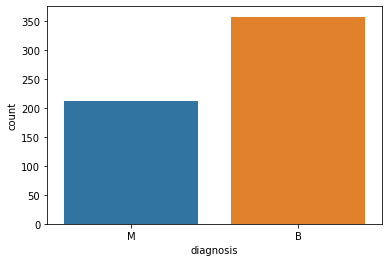

In [8]:
sns.countplot(data["diagnosis"],label = "count")

In [12]:
# look the object type columns
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [15]:
#  Encode the Catogerical data value
from sklearn.preprocessing import LabelEncoder
LabelEncoder_y = LabelEncoder()
data["diagnosis"] = LabelEncoder_y.fit_transform(data["diagnosis"].values)
# LabelEncoder_y.fit_transform(data.iloc[: , 0].values) //both are same

In [16]:
data["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [17]:
data.head(6)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [20]:
co_relation = data.corr()

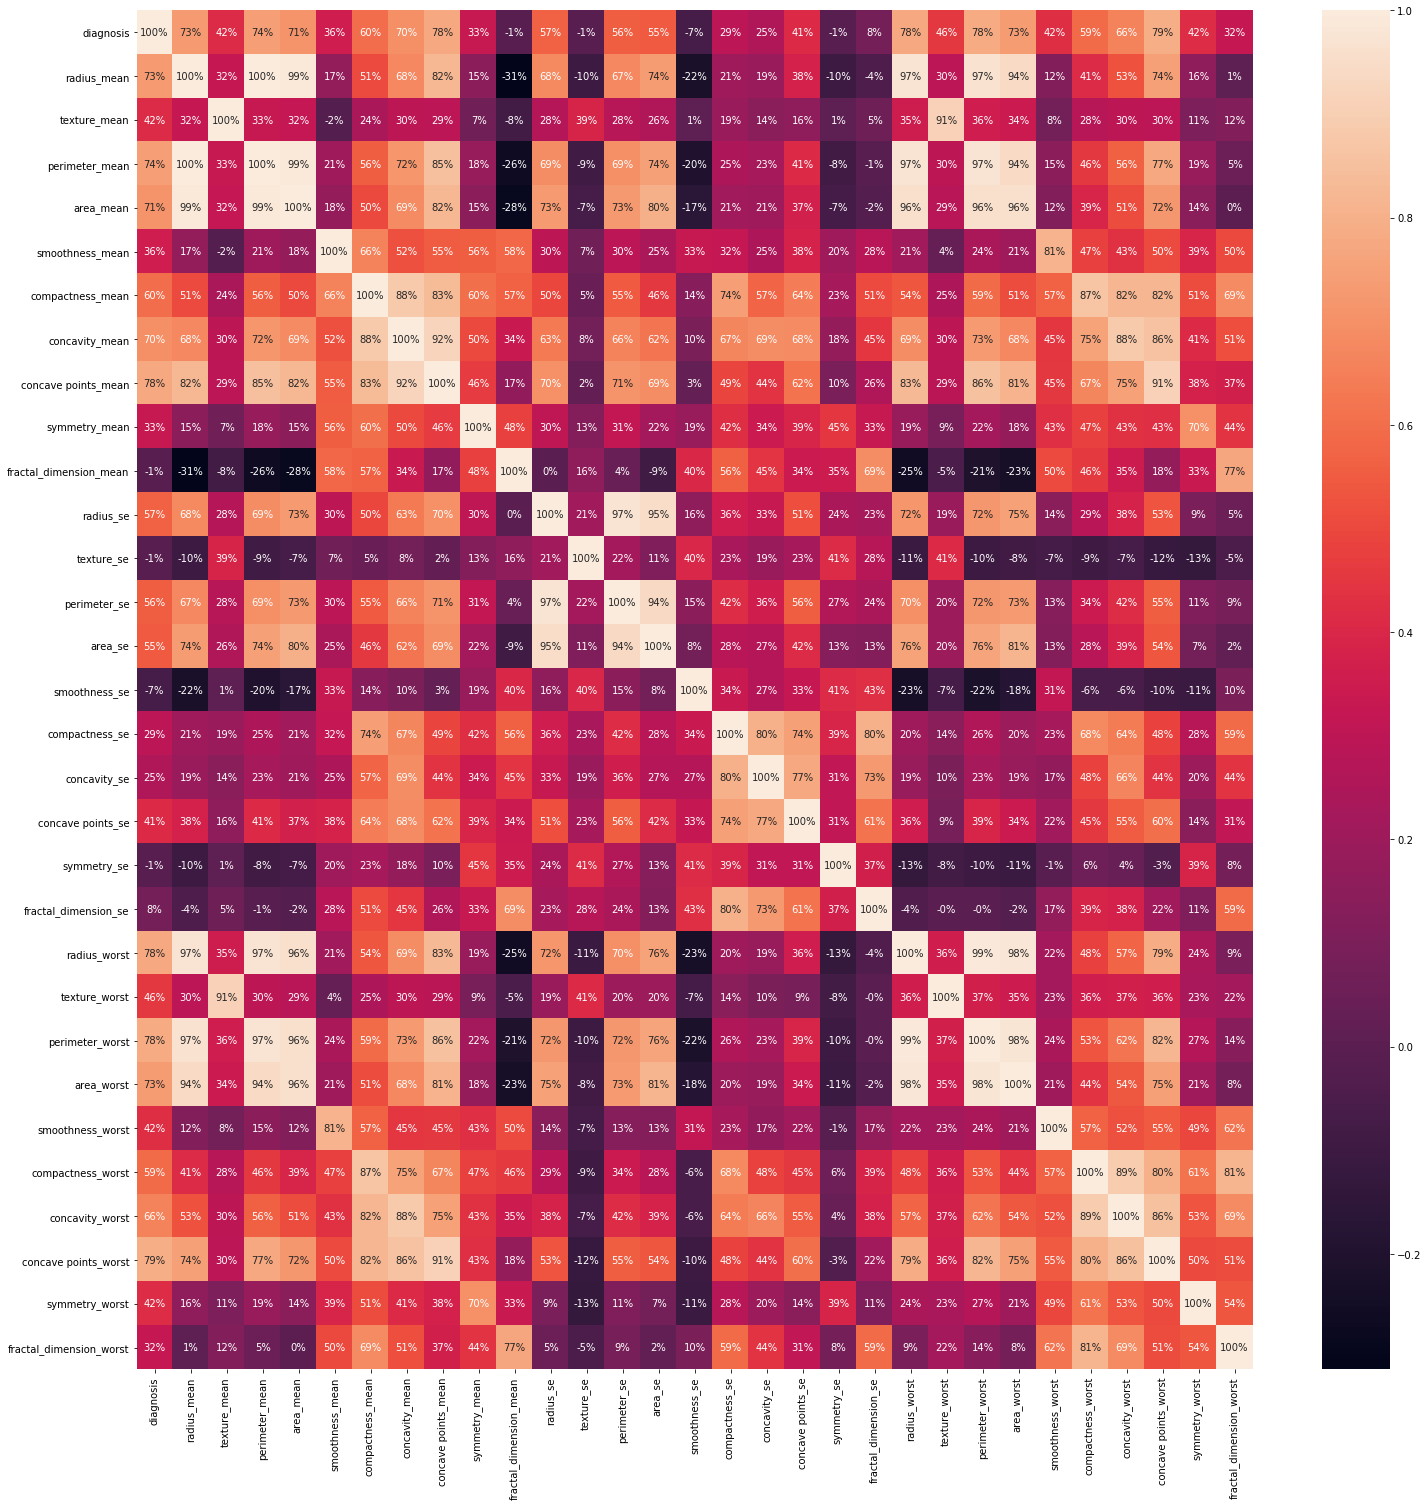

In [32]:
plt.figure(figsize = (25,25))
sns.heatmap(co_relation, annot = True, fmt = ".0%")

In [33]:
data.shape

(569, 31)

In [34]:
# Split Data into dependent and independent 
X = data.iloc[:,1:31].values
Y = data.iloc[:,0].values

In [35]:
# Split Data into 75% Tranning And 25% Testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [36]:
#  Scale The Data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [42]:
# Create a function for a model
def models(X_train, Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    lor = LogisticRegression(random_state=0)
    lor.fit(X_train, Y_train)
    
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    des_tr = DecisionTreeClassifier(criterion="entropy" , random_state=0)
    des_tr.fit(X_train, Y_train)
    
    
    #Random Forest Classifire
    from sklearn.ensemble import RandomForestClassifier
    rend = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)
    rend.fit(X_train, Y_train)
    
    #Print The model accuracy of the trainning data
    print('[0]LogisticRegression Accuracy: ', lor.score(X_train, Y_train))
    print('[1]DecisionTreeClassifier Accuracy: ', des_tr.score(X_train, Y_train))
    print('[2]RandomForestClassifier Accuracy: ', rend.score(X_train, Y_train))
    
    return lor , des_tr , rend

In [43]:
#Getting all of the models
model = models(X_train, Y_train)

[0]LogisticRegression Accuracy:  0.9906103286384976
[1]DecisionTreeClassifier Accuracy:  1.0
[2]RandomForestClassifier Accuracy:  0.9976525821596244


In [47]:
# Test model accuracy on test data confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    print('model ', i)
    cm = confusion_matrix(Y_test , model[i].predict(X_test))

    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('Testing Accuracy : ', (TP + TN) / (TP + TN + FN + FP))
    print()

model  0
[[86  4]
 [ 2 51]]
Testing Accuracy :  0.958041958041958

model  1
[[85  5]
 [ 3 50]]
Testing Accuracy :  0.9440559440559441

model  2
[[88  2]
 [ 1 52]]
Testing Accuracy :  0.9790209790209791



In [51]:
from sklearn.metrics import accuracy_score
print("LogisticRegression : " ,accuracy_score(Y_test,model[0].predict(X_test))) # For LogisticRegression
print("=============================================================================")
print("DecisionTreeClassifier : " ,accuracy_score(Y_test,model[1].predict(X_test))) # For DecisionTreeClassifier
print("=============================================================================")
print("RandomForestClassifier : " ,accuracy_score(Y_test,model[2].predict(X_test))) # For RandomForestClassifier

LogisticRegression :  0.958041958041958
DecisionTreeClassifier :  0.9440559440559441
RandomForestClassifier :  0.9790209790209791


In [53]:
# here we take randomforest for model selection and save the model in local env.
from sklearn.ensemble import RandomForestClassifier
rend = RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0)
rend.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [54]:
rend.score(X_train, Y_train)

0.9976525821596244

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,rend.predict(X_test))

0.9790209790209791

In [ ]:
# Save the model in local env.

In [58]:
import pickle
# open a file, where you ant to store the data
file = open('Cancer_Prediction.pkl', 'wb')

# dump information to that file
pickle.dump(rend, file)

In [60]:
predict_train_data = rend.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, predict_train_data)))

Accuracy = 0.979


## --Thanks By Sumit Kumar--